# Linear regression assumptions in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as st

C:\Users\luisf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\luisf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


- All assumptions of linear regression
- What are the consequence if each is violated
- How to test each assumption in python
- How to fix each violation

### Assumptions of Linear regression

- Linearity
- Autocorrelation
- Multicollinearity
- Heteroskedasticity
- Normality
These assumptions will be tested against diabetes dataset from the standard sklearn dataset.
Import data and build linear regression model

In [2]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           3.83e-62
Time:                        19:55:46   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

***Linearity***
- Expected value of the dependent variable is straight-line function of each individual independent variable.
- If this is violated, then extrapolating beyond the range of the sample data would give unrelable results
- This can be tested if predicted values and residual have pattern then relationship between dependent and independent variable is non linear.
- This can be fixed by using polynomial transformation of variables one by one manually or polynomial regression.
- If equation is , after polynomial transformation it will become

y = (β1 ∗ x1) + (β2 ∗ x2)


y = (β1 ∗ x1) + (β2 ∗ x2) + (β3 ∗ x1 ∗ x2) + (β4 ∗ x12) + (β5 ∗ x22)

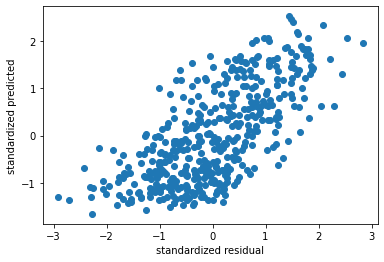

In [3]:
#step 1) calculate residual
residuals = y-est2.fittedvalues
#step 2) plot standardized residual vs actual
plt.scatter(st.zscore(residuals),st.zscore(y))
plt.xlabel('standardized residual')
plt.ylabel('standardized predicted')
plt.show()

- It looks like there is relationship between predicated values and residual.
- Theoritically speaking, model should predict values higher than actual and lower than actual with equal probability.
- We need to plot dependent vs independent variable to identify polynomial relationships and add the terms in the model.

***Normality***

- Residuals should be normally distributed.
- f it is violated, it causes problems with calculating confidence intervals and various significance tests for coefficients.
- Q-Q plot and Shapiro-Wilk test can help find if it is met or violated. Q-Q plot compares the quantiles of a data distribution with the quantiles of a standardized theoretical distribution. Majority of the middle part of the line should fall on a line.
- It can be fixed by outlier treatment and nonlinear transformation such as log

Null hypothesis rejected. Residuals are normally distributed


C:\Users\luisf\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


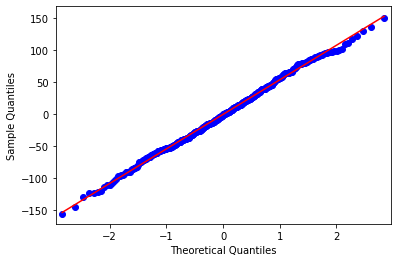

In [5]:
#normality through QQ plot
fig4=sm.qqplot(residuals, line='r')
#perform Shapiro-Wilk test
_,p=st.shapiro(residuals)
if p>0.05:
    print('Null hypothesis rejected. Residuals are normally distributed')

***Multicollinearity***

- All independent variables are independent of each other and have no correlation amongst each other.
- If it is violated, coefficient estimates will be unstable and can cause the coefficients to switch signs.
- It can be fixed by either 1) removing variables with VIF larger than 10 Or 2) by doing PCA



In [6]:
variables = est2.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[0.9999999999999998,
 1.2173065764321338,
 1.278072545982699,
 1.5094458375317008,
 1.4594285821794584,
 59.20378568651294,
 39.19437938862489,
 15.402352175616604,
 8.890986224976269,
 10.076221589049265,
 1.4846225872940024]

***Heteroskedasticity***

- Error term should have equal variance across different observations. In the case of heteroskedasticity this is violated.
- Heteroskedasticity leads to wrong standard errors of the coefficients, which results in wrong t-statistic and p-values
- It can be identified if residual vs fitted values has specific pattern, it means has non-constant variance in such case, we can use variance stabilizing transformation, such as log and sqrt. We can also solve this through quantile regression





It clearly shows that heteroskedasticity assumptions are violated


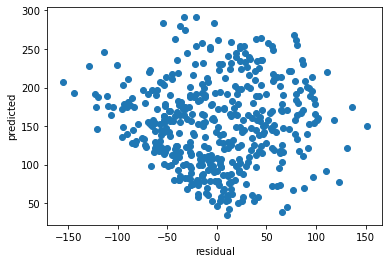

In [7]:
plt.scatter(residuals,est2.fittedvalues)
plt.xlabel('residual')
plt.ylabel('predicted')
print('It clearly shows that heteroskedasticity assumptions are violated')

***Autocorrelation***

- If errors are correlated and not independent, its said to have auto-correlation. In other words, error of instance bears an impact from
- If residual has autocorrelation, then we might get coefficient for certain variables as significant, whereas these are actually non significant. In addition F test and R square will be unreliable
- It happens mostly with time series data.
- It can be tested by durbin-watson test. If it is between 1.5 to 2.5, its good. less tahn 1.5 is negative autocorrelation, more than 2.5 is positive autocorrelation. Although 2 is considered as ideal value.
- It can be fixed by adding a lag variable. and seasonality related dummy varriables.






In [8]:
durbin_watson(residuals)

2.028541875253513